In [ ]:
!pip install pandas

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sales Data.xlsx to Sales Data.xlsx


In [ ]:
import pandas as pd
import seaborn as sns

# Ganti 'nama_file.xlsx' dengan nama file Excel yang diunggah
df = pd.read_excel('Sales Data.xlsx')

# Tampilkan DataFrame
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERDATE      STATUS  \
0           10100               30     100.00 2003-01-06     Shipped   
1           10100               50      67.80 2003-01-06     Shipped   
2           10100               22      86.51 2003-01-06     Shipped   
3           10100               49      34.47 2003-01-06     Shipped   
4           10101               25     100.00 2003-01-09     Shipped   
...           ...              ...        ...        ...         ...   
2819        10425               49     100.00 2005-05-31  In Process   
2820        10425               31      33.24 2005-05-31  In Process   
2821        10425               41      86.68 2005-05-31  In Process   
2822        10425               11      43.83 2005-05-31  In Process   
2823        10425               18     100.00 2005-05-31  In Process   

           PRODUCTLINE PRODUCTCODE                  CUSTOMERNAME       CITY  \
0         Vintage Cars    S18_1749  Online Diecast Creat

In [ ]:
#check info dari table, dari tipenya sampai jumlah row, jumlah empty
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 220.8+ KB


In [ ]:
#Check typo
for col_name in ['STATUS', 'PRODUCTLINE', 'CITY', 'CUSTOMERNAME', 'DEALSIZE']:
  print(df[col_name].value_counts(),'\n')

STATUS
Shipped       2618
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64 

PRODUCTLINE
Classic Cars        967
Vintage Cars        608
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64 

CITY
Madrid            304
San Rafael        180
NYC               152
Singapore          79
Paris              70
                 ... 
South Brisbane     15
Los Angeles        14
Munich             14
Burbank            13
Charleroi           8
Name: count, Length: 73, dtype: int64 

CUSTOMERNAME
Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Auto-Moto Classics Inc.           8
Royale Belge                      8
Atelier graphique  

In [ ]:
#Revenue Column
df['REVENUE'] = df['PRICEEACH'] * df['QUANTITYORDERED']

df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00
...,...,...,...,...,...,...,...,...,...,...,...
2819,10425,49,100.00,2005-05-31,In Process,Trucks and Buses,S24_2300,La Rochelle Gifts,Nantes,Medium,4900.00
2820,10425,31,33.24,2005-05-31,In Process,Classic Cars,S24_2840,La Rochelle Gifts,Nantes,Small,1030.44
2821,10425,41,86.68,2005-05-31,In Process,Trucks and Buses,S32_1268,La Rochelle Gifts,Nantes,Medium,3553.88
2822,10425,11,43.83,2005-05-31,In Process,Trucks and Buses,S32_2509,La Rochelle Gifts,Nantes,Small,482.13


In [ ]:
# prompt: Using dataframe df: highest and lowest sales product lines

# Calculate total revenue for each product line
product_line_revenue = df.groupby('PRODUCTLINE')['REVENUE'].sum()

# Find the product line with the highest revenue
highest_revenue_product_line = product_line_revenue.idxmax()

# Find the product line with the lowest revenue
lowest_revenue_product_line = product_line_revenue.idxmin()

# Print the results
print(f'Highest revenue product line: {highest_revenue_product_line}')
print(f'Lowest revenue product line: {lowest_revenue_product_line}')


Highest revenue product line: Classic Cars
Lowest revenue product line: Trains


In [ ]:
df.groupby('PRODUCTLINE')['REVENUE'].agg(['max', 'min'])


,max,min
PRODUCTLINE,,
Classic Cars,9048.16,640.05
Motorcycles,6600.00,651.80
Planes,7543.75,875.91
Ships,5000.00,1089.36
Trains,5000.00,972.40
Trucks and Buses,7000.00,482.13
Vintage Cars,7600.00,541.14


In [ ]:
df.groupby('PRODUCTLINE')['QUANTITYORDERED'].agg(['max'])


,max
PRODUCTLINE,
Classic Cars,97
Motorcycles,66
Planes,85
Ships,55
Trains,51
Trucks and Buses,70
Vintage Cars,76


In [ ]:
total_product_line = df['QUANTITYORDERED'].sum()
print("\nTotal produk yang diorder:", total_product_line)


Total produk yang diorder: 99095


In [ ]:
# Menghitung total jumlah produk yang diorder untuk setiap produk
product_order_totals = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().reset_index()

# Mengurutkan berdasarkan jumlah yang diorder
sorted_product_order_totals = product_order_totals.sort_values(by='QUANTITYORDERED', ascending=False)
print("\nTotal jumlah produk yang diorder untuk setiap produk:")
print(sorted_product_order_totals)


Total jumlah produk yang diorder untuk setiap produk:
        PRODUCTLINE  QUANTITYORDERED
0      Classic Cars            33992
6      Vintage Cars            21097
1       Motorcycles            11663
5  Trucks and Buses            10777
2            Planes            10727
3             Ships             8127
4            Trains             2712


In [ ]:
# Mencari produk dengan jumlah tertinggi
highest_order_product = sorted_product_order_totals.iloc[0]

# Mencari produk dengan jumlah terendah
lowest_order_product = sorted_product_order_totals.iloc[-1]

print("\nHighest Sales Product Lines:")
print(highest_order_product)

print("\nLowest Sales Product Lines:")
print(lowest_order_product)


Highest Sales Product Lines:
PRODUCTLINE        Classic Cars
QUANTITYORDERED           33992
Name: 0, dtype: object

Lowest Sales Product Lines:
PRODUCTLINE        Trains
QUANTITYORDERED      2712
Name: 4, dtype: object


SALES PERFORMANCE

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#SALES PRODUCT LINES

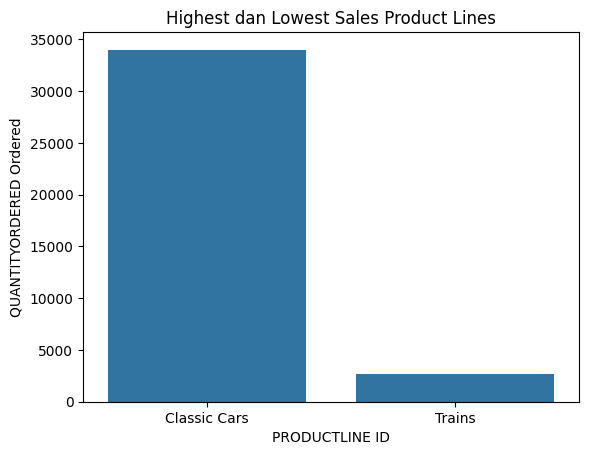

In [ ]:
# Membuat DataFrame untuk visualisasi
visualization_data = pd.DataFrame({
    'PRODUCTLINE': [highest_order_product['PRODUCTLINE'], lowest_order_product['PRODUCTLINE']],
    'QUANTITYORDERED': [highest_order_product['QUANTITYORDERED'], lowest_order_product['QUANTITYORDERED']]
})

# Plot menggunakan Seaborn
sns.barplot(data=visualization_data, x='PRODUCTLINE', y='QUANTITYORDERED')

# Menambahkan judul dan label
plt.title('Highest dan Lowest Sales Product Lines')
plt.xlabel('PRODUCTLINE ID')
plt.ylabel('QUANTITYORDERED Ordered')

# Menampilkan plot
plt.show()

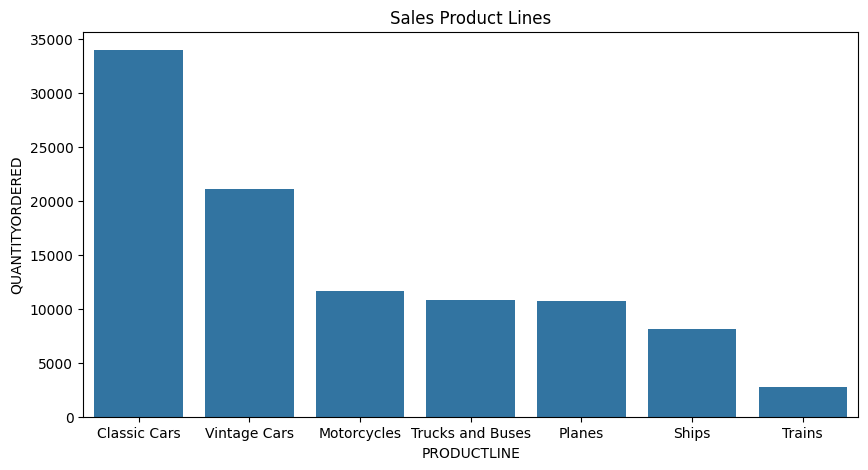

In [ ]:
visualization_data1 = pd.DataFrame ({
    'PRODUCTLINE': sorted_product_order_totals['PRODUCTLINE'].tolist(),  # Extract product lines as a list
    'QUANTITYORDERED': sorted_product_order_totals['QUANTITYORDERED'].tolist()  # Extract quantities as a list
})

sns.barplot(data=visualization_data1, x='PRODUCTLINE', y='QUANTITYORDERED')

plt.title('Sales Product Lines')
plt.xlabel('PRODUCTLINE')
plt.ylabel('QUANTITYORDERED')

plt.rcParams['figure.figsize'] = (10,5)

plt.show()

In [ ]:
print("\nHighest Sales Product Lines:")
print(highest_order_product)

print("\nLowest Sales Product Lines:")
print(lowest_order_product)


Highest Sales Product Lines:
PRODUCTLINE        Classic Cars
QUANTITYORDERED           33992
Name: 0, dtype: object

Lowest Sales Product Lines:
PRODUCTLINE        Trains
QUANTITYORDERED      2712
Name: 4, dtype: object


#DEALSIZE

In [ ]:
dealsize_totals = df.groupby('DEALSIZE')['QUANTITYORDERED'].sum().reset_index()

sorted_dealsize_totals = dealsize_totals.sort_values(by='QUANTITYORDERED', ascending=False)
print("\nTotal Order by Dealsize:")
print(sorted_dealsize_totals)


Total Order by Dealsize:
  DEALSIZE  QUANTITYORDERED
1   Medium            52519
2    Small            39162
0    Large             7414


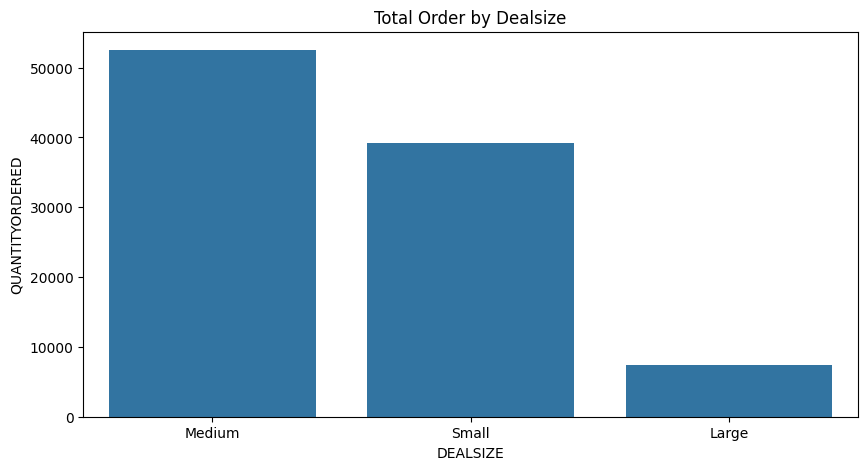

In [ ]:
visualization_data2 = pd.DataFrame ({
    'DEALSIZE': sorted_dealsize_totals['DEALSIZE'].tolist(),
    'QUANTITYORDERED': sorted_dealsize_totals['QUANTITYORDERED'].tolist()
})

sns.barplot(data=visualization_data2, x='DEALSIZE', y='QUANTITYORDERED')

plt.title('Total Order by Dealsize')
plt.xlabel('DEALSIZE')
plt.ylabel('QUANTITYORDERED')

plt.show()

([<matplotlib.patches.Wedge at 0x79c0412ca5c0>,
 [Text(-0.1034722913674828, 1.0951225889913707, 'Medium'),
  Text(-0.15441214435763345, -1.089108300250658, 'Small'),
  Text(1.0697542937007645, -0.25617523515901863, 'Large')],
 [Text(-0.056439431654990616, 0.5973395939952931, '53.0%'),
  Text(-0.08422480601325459, -0.5940590728639953, '39.5%'),
  Text(0.5835023420185987, -0.13973194645037376, '7.5%')])

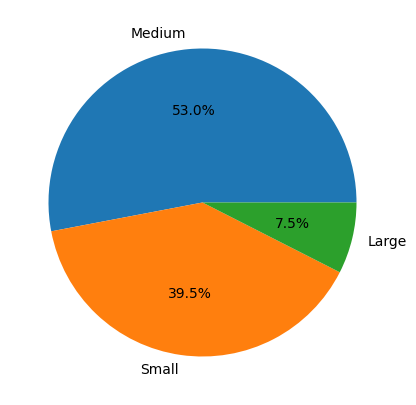

In [ ]:
plt.pie(sorted_dealsize_totals['QUANTITYORDERED'], labels = sorted_dealsize_totals['DEALSIZE'], autopct= '%.1f%%')

Dealsize was very impactfull in increasing the quantity of orders as evidenced by 53% of customers using the DealSize medium when making transactions

Medium dealsize is the highest deals in transaction with 52.519 quantity ordered